In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#переключение cpu/gpu
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

X_train = mnist.data[:60000]
X_test = mnist.data[60000:]
y_train = mnist.target[:60000]
y_test = mnist.target[60000:]

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

from keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

input_shape = (28, 28, 1)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## Запуск на CPU

In [6]:
model.fit(X_train, y_train,
          batch_size=32,
          epochs=1,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 65s - loss: 0.3084 - acc: 0.9136 - val_loss: 0.0647 - val_acc: 0.9804


In [7]:
model.fit(X_train, y_train,
          batch_size=1024,
          epochs=1,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 39s - loss: 0.1126 - acc: 0.9678 - val_loss: 0.0511 - val_acc: 0.9839


In [8]:
model.fit(X_train, y_train,
          batch_size=4096,
          epochs=1,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 38s - loss: 0.0917 - acc: 0.9731 - val_loss: 0.0487 - val_acc: 0.9847


## Запуск на GPU

In [6]:
model.fit(X_train, y_train,
          batch_size=32,
          epochs=1,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 21s - loss: 0.1143 - acc: 0.9673 - val_loss: 0.0501 - val_acc: 0.9833


In [7]:
model.fit(X_train, y_train,
          batch_size=1024,
          epochs=1,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 8s - loss: 0.0741 - acc: 0.9785 - val_loss: 0.0368 - val_acc: 0.9873


In [11]:
model.fit(X_train, y_train,
          batch_size=4096,
          epochs=1,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 10s - loss: 0.0556 - acc: 0.9833 - val_loss: 0.0338 - val_acc: 0.9880


## Сравнение разных моделей

In [4]:
n_epochs = 20

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,
                 batch_size=1024,
                 epochs=n_epochs,
                 verbose=0,
                 validation_data=(X_test, y_test))

model_0 = hist

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,
                 batch_size=1024,
                 epochs=n_epochs,
                 verbose=0,
                 validation_data=(X_test, y_test))

model_1 = hist

In [7]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,
                 batch_size=1024,
                 epochs=n_epochs,
                 verbose=0,
                 validation_data=(X_test, y_test))

model_2 = hist

In [8]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,
                 batch_size=1024,
                 epochs=n_epochs,
                 verbose=0,
                 validation_data=(X_test, y_test))

model_3 = hist

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,
                 batch_size=1024,
                 epochs=n_epochs,
                 verbose=0,
                 validation_data=(X_test, y_test))

model_4 = hist

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,
                 batch_size=1024,
                 epochs=n_epochs,
                 verbose=0,
                 validation_data=(X_test, y_test))

model_5 = hist

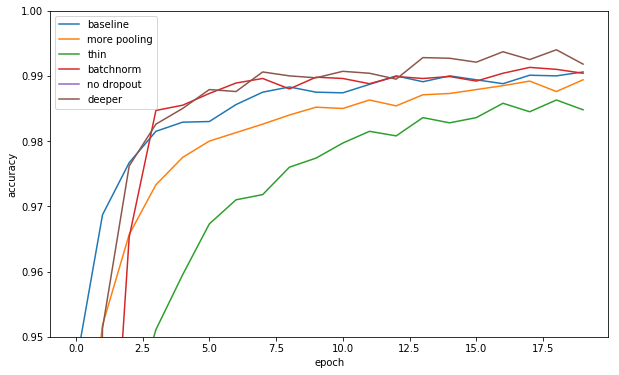

In [11]:
plt.figure(figsize=(10, 6))
key = 'val_acc'
plt.plot(model_0.history[key], label='baseline')
plt.plot(model_1.history[key], label='more pooling')
plt.plot(model_2.history[key], label='thin')
plt.plot(model_3.history[key], label='batchnorm')
plt.plot(model_4.history[key], label='no dropout')
plt.plot(model_5.history[key], label='deeper')
plt.ylim([0.95, 1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()